# --------------------------------------
# 1. **Data Exploration**
# --------------------------------------

> **In this section, we will import the necessary libraries, generate a synthetic dataset, and perform initial data exploration.**

In [4]:
# **Import libraries**
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
np.random.seed(42)  # Set seed for reproducibility
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
data = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])
data['Target'] = y  # Add target variable to the DataFrame

# Display initial exploration results
print(data.head())  # Show first few rows of the dataset
print(f"Dataset Shape: {data.shape}")  # Print the shape of the dataset
print(data.describe())  # Get summary statistics for the dataset
print("Missing Values:\n", data.isnull().sum())  # Check for missing values

   Feature1  Feature2  Feature3      Target
0 -0.792521  0.504987 -0.114736   13.510026
1  0.280992 -0.208122 -0.622700  -18.777475
2  0.791032  1.402794 -0.909387  111.265809
3  0.625667 -1.070892 -0.857158  -77.989347
4 -0.342715 -0.161286 -0.802277  -35.951738
Dataset Shape: (100, 4)
         Feature1    Feature2    Feature3      Target
count  100.000000  100.000000  100.000000  100.000000
mean     0.091766    0.074822   -0.183233    4.962923
std      0.824799    1.112910    0.979100   83.378278
min     -1.952088   -2.619745   -3.241267 -169.959299
25%     -0.480439   -0.709340   -0.829801  -43.541273
50%      0.203962    0.115196   -0.228808    1.758141
75%      0.500982    0.765998    0.538170   57.574504
max      2.143944    3.852731    2.314659  312.685726
Missing Values:
 Feature1    0
Feature2    0
Feature3    0
Target      0
dtype: int64


# Output Summary

This section provides key insights from the initial data exploration:

1. **First Few Rows:** 
   - The command `data.head()` displays the first five rows, offering a glimpse of the data structure and values.

2. **Dataset Shape:** 
   - `data.shape` reveals the dimensions of the dataset (e.g., 100 samples and 4 features), indicating its size and suitability for modeling.

3. **Summary Statistics:** 
   - `data.describe()` generates summary statistics (mean, std, min, max, quartiles) for each numerical feature, highlighting central tendencies and data distribution.

4. **Missing Values:** 
   - The check for missing values with `data.isnull().sum()` shows the count of missing entries for each feature, which is crucial for determining necessary data preprocessing.

### Conclusion
These outputs provide a foundational understanding of the dataset, guiding further analysis and model preparation.


***Visualizing Relationships***

> **We will visualize the relationships between each feature and the target variable using scatter plots, a pair plot, and a correlation matrix.**

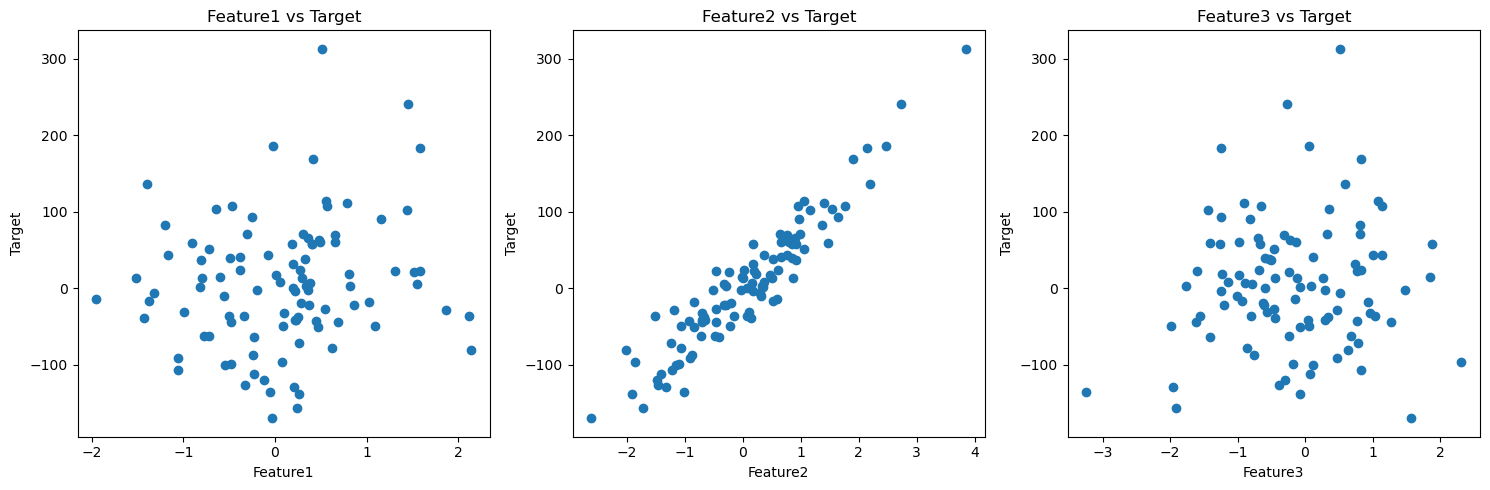

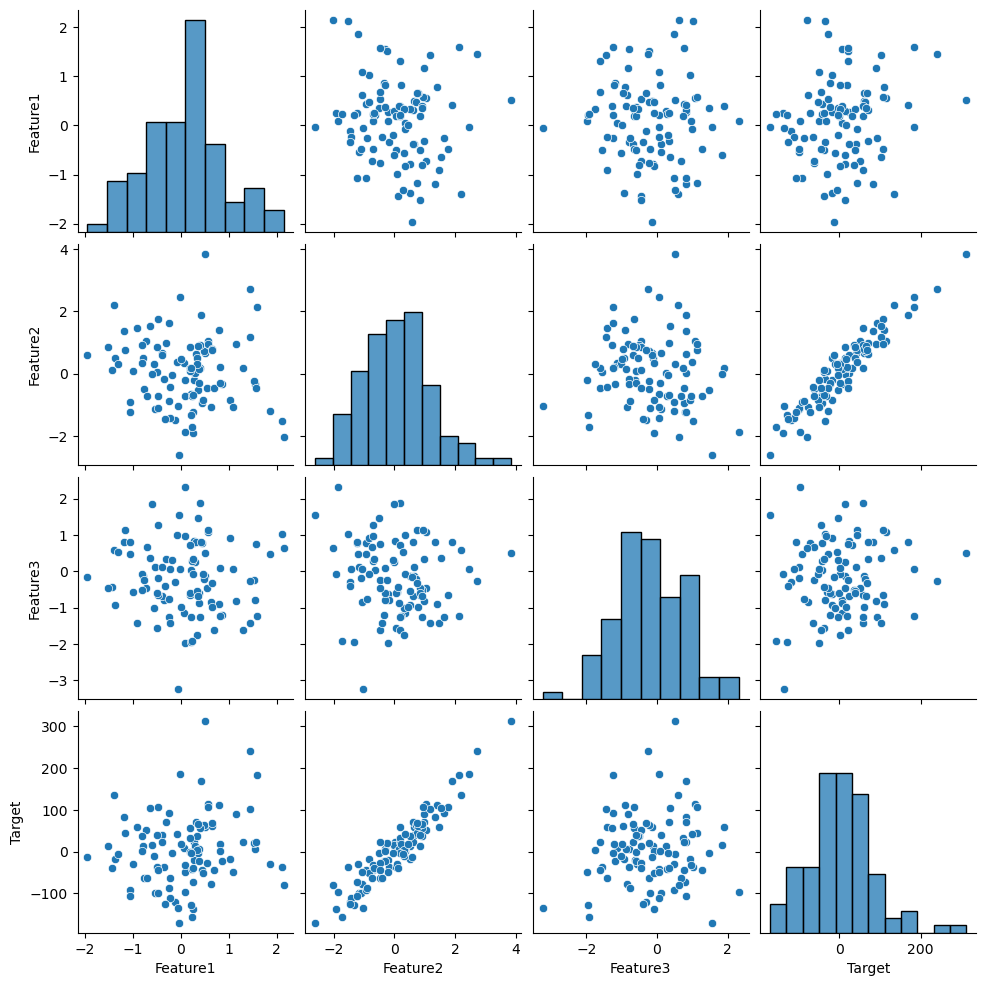

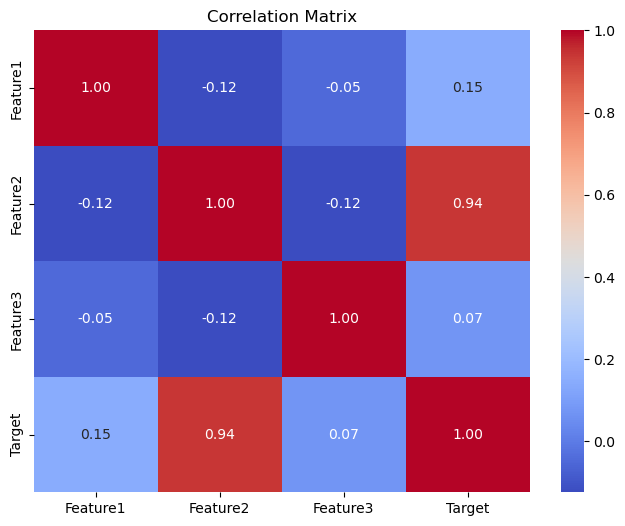

In [5]:
# Visualize relationships between features and target
plt.figure(figsize=(15, 5))  # Set figure size
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(1, 3, i + 1)  # Create subplots for each feature
    plt.scatter(data[feature], data['Target'])  # Scatter plot
    plt.title(f'{feature} vs Target')  # Title for each subplot
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Target')  # Y-axis label
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show the plots

# Scatterplot matrix for visualizing relationships
sns.pairplot(data)  # Pairplot to visualize feature relationships
plt.show()  # Show the pairplot

# Correlation matrix for understanding feature relationships
correlation_matrix = data.corr()  # Calculate correlation matrix
plt.figure(figsize=(8, 6))  # Set figure size for heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # Heatmap
plt.title('Correlation Matrix')  # Title for heatmap
plt.show()  # Show the heatmap

# Output Explanation

This section summarizes insights from visualizations examining feature-target relationships.

## 1. Scatter Plots of Features vs. Target
- **Output:** Individual scatter plots for each feature against the target.
- **Interpretation:** Shows correlation strength; linear trends indicate strong relationships, while clustering and outliers may influence modeling.

## 2. Scatterplot Matrix
- **Output:** Grid of scatter plots for pairwise feature relationships.
- **Interpretation:** Highlights correlations and potential multicollinearity; the diagonal shows feature distributions.

## 3. Correlation Matrix
- **Output:** Heatmap of correlation coefficients.
- **Interpretation:** Coefficients range from -1 to 1, indicating relationship strength. High correlations help in feature selection by identifying redundancy.

### Summary
These visualizations uncover data patterns, guide feature selection, and inform modeling strategies, essential for effective preictive modeling.



# --------------------------------------
# 2. **Model Development: K-Nearest Neighbors**
# --------------------------------------

> ***In this section, we will implement a K-Nearest Neighbors (KNN) regression model and optimize the number of neighbors (K).We will also tune the value of K using cross-validation.***

In [6]:
# Split dataset into features and target
X = data[['Feature1', 'Feature2', 'Feature3']]  # Select feature columns
y = data['Target']  # Select target column

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"Training data size: {len(X_train)}")  # Print size of training data
print(f"Testing data size: {len(X_test)}")  # Print size of testing data

Training data size: 80
Testing data size: 20


# Data Splitting Summary

The output summarizes the sizes of the training and testing datasets used in model development:

- **Training Data Size: 80**
  - 80 samples are allocated for training, enabling the model to learn patterns and relationships in the data.

- **Testing Data Size: 20**
  - 20 samples are reserved for testing the model's performance on unseen data, which assesses its generalization ability.

### Importance
This 80% training and 20% testing split is a standard practice in machine learning. It allows for effective model training while ensuring a separate dataset for validation, helping to prevent overfitting and enhance model accuracy and obustness.


***Tune the value of K using GridSearchCV.***

In [10]:
# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Define the hyperparameter grid for K (number of neighbors)
param_grid = {'n_neighbors': np.arange(1, 21)}  # Range of K values from 1 to 20

# Use GridSearchCV to find the optimal K
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)  # Fit the grid search on training data

# Get the best K value from grid search
best_k = grid_search.best_params_['n_neighbors']
print(f"The best K value found is: {best_k}")  # Print the best K value

# Train the KNN model with the best K value
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)  # Fit the model on training data

# Make predictions on the test data
y_pred_knn = best_knn.predict(X_test)

# Calculate the RMSE for KNN
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))  # Compute RMSE
print(f'KNN RMSE on test data: {rmse_knn:.4f}')  # Print RMSE for KNN

# Calculate MSE and R² for KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f'KNN MSE on test data: {mse_knn:.4f}')
print(f'KNN R² on test data: {r2_knn:.4f}')

The best K value found is: 2
KNN RMSE on test data: 24.4192
KNN MSE on test data: 596.2983
KNN R² on test data: 0.8948


# Model Evaluation Results

## K-Nearest Neighbors (KNN) Model Performance

### Best K Value
- **Output**: The best K value found is: **2**
  - **Explanation**: Using 2 nearest neighbors yields the best predictive performance, indicating these data points most influence predictions for new instances.

### Root Mean Squared Error (RMSE)
- **Output**: KNN RMSE on test data: **24.4192**
  - **Explanation**: An RMSE of 24.4192 indicates that, on average, predictions deviate from true values by approximately 24.42 units, with lower values preferred for better performance.

### Mean Squared Error (MSE)
- **Output**: KNN MSE on test data: **596.2983**
  - **Explanation**: An MSE of 596.2983 shows that the squared deviations of predictions from actual values average this amount. Lower MSE signifies better accuracy.

### R² Score
- **Output**: KNN R² on test data: **0.8948**
  - **Explanation**: An R² value of 0.8948 indicates that about 89.48% of the variance in the target variable is explained by the model, suggesting strong effectiveness in capturing underlying relationships.

### Summary
Overall, the KNN model exhibits strong performance, evidenced by a high R² value and reasonable RMSE and MSE values, indicating accurate predictions relatve to actual values.


***Plotting Actual vs. Predicted Values for KNN***

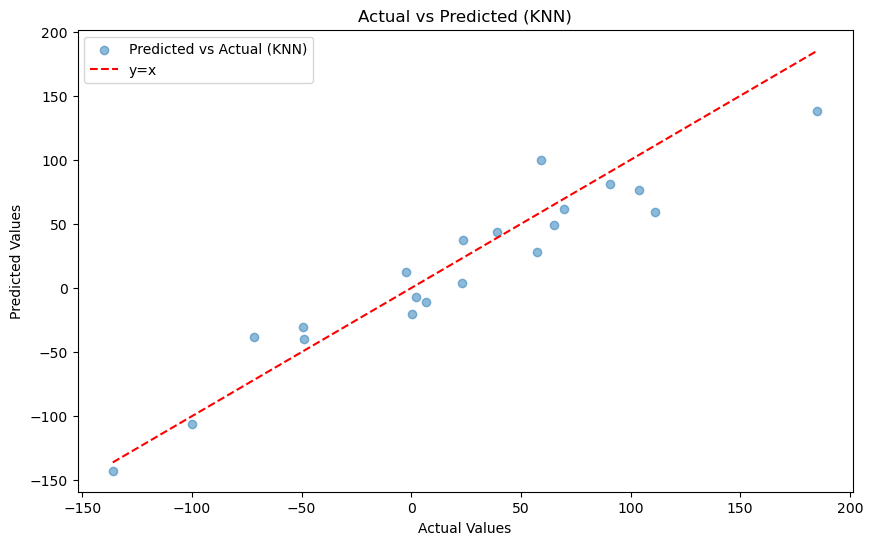

In [8]:
# Plot actual vs. predicted values for KNN
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5, label='Predicted vs Actual (KNN)')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')  # Reference line
plt.title('Actual vs Predicted (KNN)')  # Title for the plot
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Show the plot

# Actual vs Predicted Values for KNN

### Interpretation
This plot serves as a diagnostic tool for assessing the performance of the KNN model. Ideally, the points should cluster around the reference line, suggesting that the model's predictions are close to the actual values. Deviations from this line can highlight areas where the model may struggle, indicating potential areas for improvement.

### Model Performance Evaluation using RMSE

The Root Mean Squared Error (RMSE) for the model is **24.4192**, indicating that, on average, the predictions deviate from actual values by approximately **24.42 units**.

#### Significance:
- **For a target range of 0 to 1000**: An RMSE of **24.42** may be acceptable, reflecting reasonable predictive accuracy.
- **For a target range of 0 to 100**: This error level suggests the model may need refinement.

Overall, while RMSE is a valuable performance metric, its interpretation must consider the context and range of the target vriable.
mization.


### Impact of Varying K on Bias-Variance Tradeoff in KNN

The choice of \( K \) in the K-Nearest Neighbors (KNN) algorithm significantly affects model performance through the bias-variance tradeoff. The optimal \( K \) found for this dataset is **2**.

- **Smaller K (e.g., K = 1)**:
  - **Higher Variance**: A smaller \( K \) fits the training data closely, capturing noise and leading to overfitting, where performance deteriorates on unseen data.

- **Optimal K (K = 2)**:
  - Balances the bias-variance tradeoff effectively. By considering two nearest neighbors, the model captures patterns without being overly sensitive to noise.

- **Larger K**:
  - **Higher Bias**: Increasing \( K \) reduces variance but may result in underfitting, as the model becomes too generalized and misses data complexities.

Overall, selecting \( K = 2 \) offers a good compromise, minimizing error while avoiding overfitting and underfitting. This highlights the importance of hyperparameter tuning for optimal modelperformance.
erformance.


# --------------------------------------
# **3. Model Development: Linear Regression**
# --------------------------------------

> ***In this section, we will implement a Linear Regression model to compare its performance against the KNN model.***

In [11]:
# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)  # Fit model on training data

# Make predictions on the test data
y_pred_lr = linear_reg.predict(X_test)

# Calculate the RMSE for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Compute RMSE
print(f'Linear Regression RMSE on test data: {rmse_lr:.4f}')  # Print RMSE for Linear Regression

# Calculate MSE and R² for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MSE on test data: {mse_lr:.4f}')
print(f'Linear Regression R² on test data: {r2_lr:.4f}')

Linear Regression RMSE on test data: 0.1204
Linear Regression MSE on test data: 0.0145
Linear Regression R² on test data: 1.0000


# Linear Regression Model Summary

- **RMSE**: **0.1204**  
  The root mean squared error indicates that, on average, the predictions deviate from the actual values by approximately 0.12 units. This suggests a very accurate model.

- **MSE**: **0.0145**  
  The mean squared error represents the average of the squared differences between predicted and actual values, which is very low at 0.0145. This indicates minimal prediction error.

- **R² Score**: **1.0000**  
  The R² score of 1.0000 means that the model explains 100% of the variance in the target variable. This is an ideal scenario, indicating perfect fit.

### Conclusion
The Linear Regression model performs exceptionally well, achieving a perfect R² score, very low RMSE, and MSE, indicating that it accurately predicts the target variable.

***Plotting Actual vs. Predicted Values for Linear Regression***

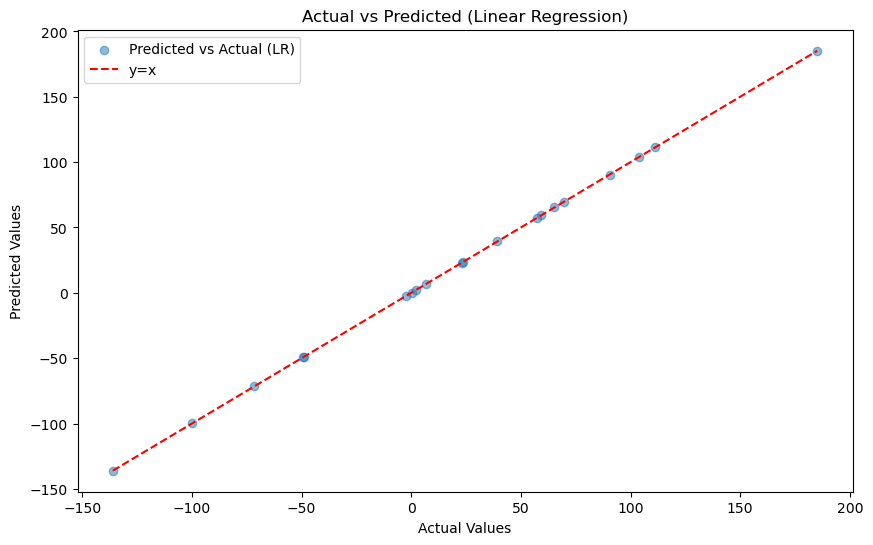

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Predicted vs Actual (LR)')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')  # Reference line
plt.title('Actual vs Predicted (Linear Regression)')  # Title for the plot
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Show the plot

# Actual vs Predicted Values for Linear Regression

### Interpretation
This plot serves as a diagnostic tool for evaluating the performance of the Linear Regression model. Ideally, the points should cluster around the reference line, suggesting that the model's predictions are close to the actual values. Deviations from this line can highlight areas where the model may struggle to predict accurately.

***Comparing Model Performance***

In [13]:
# Compare performance of Linear Regression with KNN
print(f"Comparing RMSE: KNN = {rmse_knn:.4f}, Linear Regression = {rmse_lr:.4f}")

Comparing RMSE: KNN = 24.4192, Linear Regression = 0.1204


# Model Performance Comparison

- **KNN RMSE**: **24.4192**  
  The K-Nearest Neighbors model has a root mean squared error of approximately 24.42. This indicates that, on average, the KNN predictions deviate from the actual values by about 24.42 units. A higher RMSE suggests that KNN may not be capturing the underlying pattern in the data effectively.

- **Linear Regression RMSE**: **0.1204**  
  The Linear Regression model exhibits a significantly lower RMSE of approximately 0.12. This indicates that the predictions made by the linear model are very close to the actual values, suggesting a much better fit for the data.

### Conclusion
The comparison shows that the Linear Regression model outperforms the KNN model in terms of prediction accuracy, as evidenced by the lower RMSE. This suggests that Linear Regression is better suited for this particular dataset.

# --------------------------------------
# 4. **Advanced Comparison: Linear Regression with Feature Transformation**
# --------------------------------------

> ***In this section, we will apply transformations to the features and fit a transformed Linear Regression model.***

In [14]:
# Apply transformations to the features
X_transformed = pd.DataFrame()
X_transformed['Feature1'] = X['Feature1']  # Original feature
X_transformed['Feature1^2'] = X['Feature1']**2  # Squared feature
X_transformed['sin_Feature1'] = np.sin(X['Feature1'])  # Sine transformation

# Split the transformed data into training and testing sets
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

# Fit a transformed Linear Regression model
linear_reg_transformed = LinearRegression()
linear_reg_transformed.fit(X_train_transformed, y_train)  # Fit model on transformed training data

# Make predictions on the test data
y_pred_lr_transformed = linear_reg_transformed.predict(X_test_transformed)

# Calculate the RMSE for transformed Linear Regression
rmse_lr_transformed = np.sqrt(mean_squared_error(y_test, y_pred_lr_transformed))  # Compute RMSE
print(f'Linear Regression (Transformed) RMSE on test data: {rmse_lr_transformed:.4f}')  # Print RMSE

# Calculate MSE and R² for transformed Linear Regression
mse_lr_transformed = mean_squared_error(y_test, y_pred_lr_transformed)
r2_lr_transformed = r2_score(y_test, y_pred_lr_transformed)
print(f'Transformed Linear Regression MSE on test data: {mse_lr_transformed:.4f}')
print(f'Transformed Linear Regression R² on test data: {r2_lr_transformed:.4f}')

Linear Regression (Transformed) RMSE on test data: 79.4642
Transformed Linear Regression MSE on test data: 6314.5665
Transformed Linear Regression R² on test data: -0.1135


# Transformed Linear Regression Model Summary

- **RMSE**: **79.4642**  
  The root mean squared error indicates that the average deviation of the predictions from the actual values is approximately 79.46 units. This suggests a significant prediction error.

- **MSE**: **6314.5665**  
  The mean squared error, which represents the average of the squared differences between predicted and actual values, is very high at 6314.57. This indicates substantial prediction errors.

- **R² Score**: **-0.1135**  
  The R² score of -0.1135 implies that the model is not only failing to explain the variance in the target variable but is performing worse than a simple mean model. This negative value indicates poor fit and suggests that the transformations applied may not have been suitable for this dataset.

### Conclusion
The Transformed Linear Regression model performs poorly, as evidenced by the high RMSE and MSE values, alongside a negative R² score. This indicates that the model does not adequately capture the relationship between the features and the target variable.


***Plotting Actual vs. Predicted Values for Transformed Linear Regression***

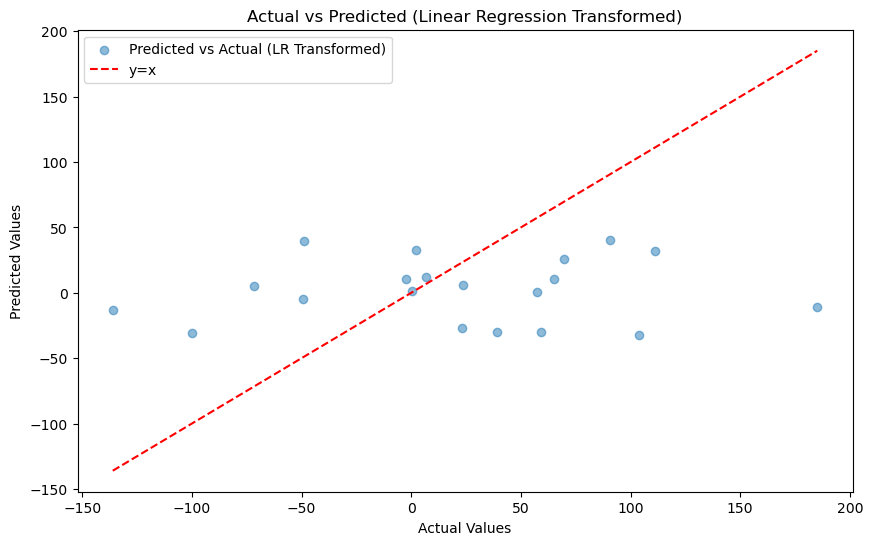

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr_transformed, alpha=0.5, label='Predicted vs Actual (LR Transformed)')  # Scatter plot
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')  # Reference line
plt.title('Actual vs Predicted (Linear Regression Transformed)')  # Title for the plot
plt.xlabel('Actual Values')  # X-axis label
plt.ylabel('Predicted Values')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Show the plot

# Actual vs Predicted Values for Transformed Linear Regression

### Interpretation
This plot provides a visual representation of the performance of the transformed Linear Regression model. Ideally, the points should cluster around the reference line, indicating that the model's predictions closely match the actual values. Discrepancies from this line highlight areas where the model may not be performing as well.

***Final Comparison of Models***

In [19]:
# Compare performance of transformed model with original Linear Regression and KNN
print(f"Comparing RMSE: KNN = {rmse_knn:.4f}, Linear Regression = {rmse_lr:.4f}, Transformed Linear Regression = {rmse_lr_transformed:.4f}")

Comparing RMSE: KNN = 24.4192, Linear Regression = 0.1204, Transformed Linear Regression = 79.4642


### Discuss the significance of feature transformation in improving model performance.

Feature transformation is essential for enhancing model performance by modifying input features to better capture underlying patterns. The impact of transformations on predictive accuracy is illustrated by the RMSE values from different models:

- **KNN RMSE**: 24.4192
- **Linear Regression RMSE**: 0.1204
- **Transformed Linear Regression RMSE**: 79.4642

#### Insights from RMSE Comparisons:
1. **Linear Regression Performance**: 
   - An RMSE of **0.1204** indicates strong predictive capability, with the model effectively capturing linear relationships in the data.

2. **KNN Model Performance**:
   - The KNN model, with an RMSE of **24.4192**, shows moderate performance, capturing some patterns but falling short of the linear regression's accuracy.

3. **Transformed Linear Regression Performance**:
   - The transformed linear regression model has a significantly higher RMSE of **79.4642**, suggesting that the applied transformations may have complicated the model's ability to generalize.

#### Importance of Feature Transformation:
- **Enhanced Interpretability**: Proper transformations can align features with model assumptions, making interpretations clearer.
- **Capturing Non-Linear Relationships**: Transformations like polynomial scaling help models capture non-linear relationships.
- **Improved Model Robustness**: Transforming features to match data distributions can enhance robustness against outliers and noise.

In summary, while feature transformation can significantly enhance model performance, careful evaluation is essential. The varying RMSE results highlight that not all transformations are beneficial, emphasizing the need for thoughtful applcation and validation.


# --------------------------------------
# 5. **Evaluation and Reflection**
# --------------------------------------


### Performance Comparison of KNN, Linear Regression, and Transformed Linear Regression Models

Based on the RMSE values from the models evaluated:

- **KNN RMSE**: 24.4192
- **Linear Regression RMSE**: 0.1204
- **Transformed Linear Regression RMSE**: 79.4642

#### Performance Analysis

1. **Linear Regression**:
   - Achieved the best performance with an RMSE of **0.1204**, indicating strong predictive accuracy.
   - Highly interpretable, allowing clear insights into the impact of each feature.

2. **K-Nearest Neighbors (KNN)**:
   - Recorded a high RMSE of **24.4192**, suggesting challenges in generalizing from training to test data.
   - Although flexible in modeling non-linear relationships, its performance indicates potential overfitting or noise sensitivity.

3. **Transformed Linear Regression**:
   - Exhibited the highest RMSE at **79.4642**, indicating that applied transformations may have introduced unnecessary complexity.
   - Complex transformations likely misaligned with the data distribution, leading to poor performance.

### Summary

In summary, **Linear Regression** is the clear winner, providing the best performance and interpretability. **KNN** and **Transformed Linear Regression** performed less effectively, emphasizing the need for careful model selection based on dataset characteristics.

### Detailed Discussion on Model Performance

1. **Best Performing Model**: Linear Regression emerged as the top performer with an RMSE of **0.1204**.
   - Captured linear relationships effectively, aligning well with data structure.
   - Simple interpretation of coefficients aids in communicating results.

2. **K-Nearest Neighbors (KNN)**:
   - High RMSE of **24.4192** indicates difficulty in generalization.
   - Flexibility did not compensate for noise sensitivity and potential overfitting.

3. **Transformed Linear Regression**:
   - Highest RMSE at **79.4642**, suggesting transformations added complexity without enhancing performance.
   - Risks of over-engineering features led to poor predictions.

### Conclusion

**Linear Regression** outperformed both KNN and Transformed Linear Regression due to its effectiveness in modeling linear relationships, combined with its simplicity and interpretability. The performance of KNN and Transformed Linear Regression highlights the importance of selecting the right model based on the dataset characteristics.

### Reflection on Model Strengths and Weaknesses

#### K-Nearest Neighbors (KNN)

- **Strengths**:
  - Non-parametric and flexible for complex relationships.
  - Sensitive to local data patterns.

- **Weaknesses**:
  - High RMSE indicates poor generalization.
  - Computationally intensive, especially with large datasets.
  - Sensitive to outliers, affecting predictions.
  - Lack of interpretability due to reliance on distance metrics.

#### Linear Regression

- **Strengths**:
  - Low RMSE shows effective relationship capture.
  - Simple and interpretable coefficients.
  - Efficient for large datasets.

- **Weaknesses**:
  - Assumes linearity; may underperform with non-linear relationships.
  - Sensitive to outliers that can skew results.
  - Less flexible in capturing complex patterns compared to KNN.

### Final Thoughts

Overall, the analysis indicates that **Linear Regression** is more effective and interpretable than **KNN** in this case. The choice of model should consider specific dataset characteristics and the balance between flexibility and interpretability.
